# TP2 : Introduction a Python et modele lineaire

## Setup

In [142]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KernelDensity
from sklearn import linear_model

from scipy.stats import gaussian_kde
from scipy.stats import norm

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib

%matplotlib inline 
matplotlib.rcParams['figure.figsize']=(14,8) # Defini la taille des figures
plt.style.use('ggplot') # Style predefini pour l'affichage des figures

## Exercice 1 : Experience de Galton

Le terme régression a été introduit par Sir Francis Galton (cousin de C. Darwin) alors qu'il étudiait la taille des individus au sein d'une descendance. Il tentait de comprendre pourquoi les grands individus d'une population semblaient avoir des enfants d'une taille plus petite, plus proche de la taille moyenne de la population ; d'où l'introduction du terme régression. Dans la suite on va s'intéresser aux données récoltées par Galton.

### Question 1

1) Récupérer les données du fichier http://josephsalmon.eu/enseignement/TELECOM/MDI720/datasets/Galton.txt (voir aussi leur description ici 1: http://josephsalmon.eu/enseignement/TELECOM/MDI720/datasets/Galton_description.txt)et charger les avec Pandas. On utilisera read_csv pour cela, et en arrondira les tailles sans chiffre après la virgule.

In [143]:
# Load data
url = 'http://josephsalmon.eu/enseignement/TELECOM/MDI720/datasets/Galton.txt'
galton = pd.read_csv(url, sep='\t', na_values=['?', ''])

# Calcul arrondis des tailles en cm
galton.Father = round(galton.Father*2.54,0)
galton.Mother = round(galton.Mother*2.54,0)
galton.Height = round(galton.Height*2.54,0)

### Question 2

2) Combien de données manquantes y-t-il dans cette base de données ? Enlever si besoin les lignes ayant des données manquantes.

In [144]:
# Calcul du nombre de données manquantes
galton.isnull().sum()

Family    0
Father    0
Mother    0
Gender    0
Height    0
Kids      0
dtype: int64

In [145]:
# Supprime toutes les lignes ayant des valeurs manquantes
len_galton_init = len(galton)
galton = galton.dropna(axis=0, how='any')
len_galton_clean = len(galton)

# Affiche le nouveau nombre de ligne supprimé apres "nettoyage"
print("Nombre de lignes supprimés : " + str(len_galton_init - len_galton_clean))

Nombre de lignes supprimés : 0


Il n'y a pas de valeurs manquantes dans le data frame.

### Question 3

3) Afficher sur un même graphe un estimateur de la densité des tailles de la population des pères en bleu, et de celles des mères en orange

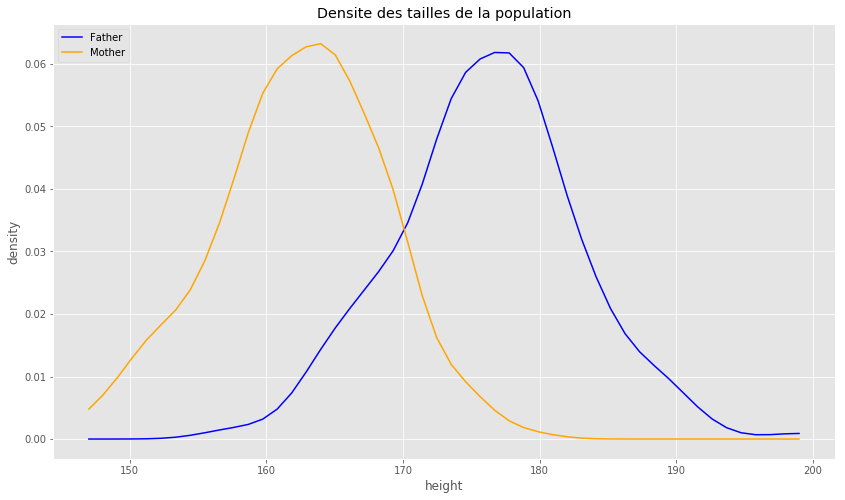

In [146]:
# Recupere les informations sur le premier enfant de chaque famille
# Pour ne pas prendre en compte plusieurs fois les memes parents
galton2 = galton.groupby(galton.Family).first()

# Calcul d'un estimateur gaussien de la densite des tailles de la population
density_father = gaussian_kde(galton2.Father)
density_mother = gaussian_kde(galton2.Mother)

# Calcul de l'axe des abcisses du graphe
min_height = min(galton.Father.min(), galton.Mother.min())
max_height = max(galton.Father.max(), galton.Mother.max())
xs = np.linspace(min_height, max_height)

# Affichage du graphe de la densite des tailles de la population
plt.plot(xs,density_father(xs), label="Father", color="blue")
plt.plot(xs,density_mother(xs), label="Mother", color="orange")
plt.title("Densite des tailles de la population")
plt.xlabel("height"), plt.ylabel("density")
plt.legend(loc=2)
plt.show()

### Question 4

4) Afficher la taille du père en fonction de la taille de la mère pour les n observations figurant dans les données. Ajouter la droite de prédiction obtenue par la méthode des moindres carrés (avec constante et sans centrage/normalisation).

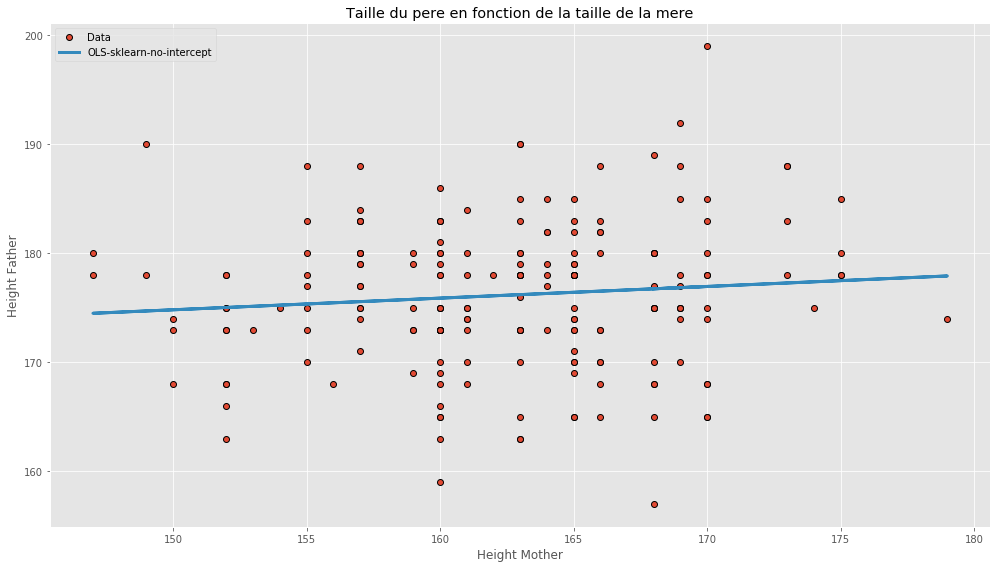

In [147]:
y = galton2['Father']
X = galton2[['Mother']]

# Calcul de la droite de prediction par la methode des moindres carrés 
skl_linmod = linear_model.LinearRegression(fit_intercept=True)
skl_linmod.fit(X, y)

# Affichage des data sur le graphique
plt.xlabel("Height Mother"), plt.ylabel("Height Father")
plt.title('Taille du pere en fonction de la taille de la mere')
plt.plot(X, y, 'o', label="Data", markeredgecolor='k', markeredgewidth=1)

# Affichage de la droite de prediction obtenue par la methode des moindres carrés
plt.plot(X, skl_linmod.predict(X), linewidth=3, label="OLS-sklearn-no-intercept")
plt.legend(numpoints=1, loc=2)  # numpoints = 1 for nicer display
plt.tight_layout()
plt.show()

### Question 5

5) Afficher un histogramme du nombre d'enfants par famille

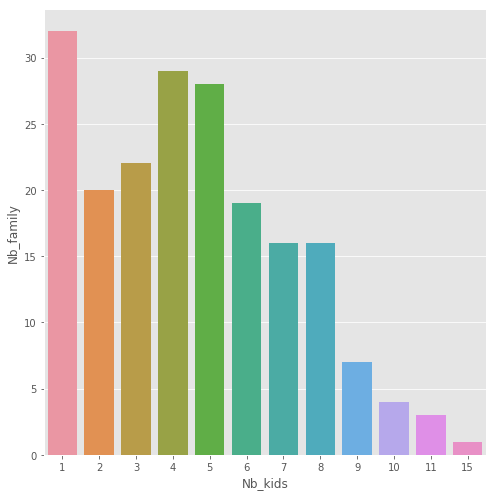

In [148]:
# Recupere les informations sur le premier enfant de chaque famille
galton2 = galton.groupby(galton.Family).first()

# Calcul du nombre d'enfant par famille
galton3 = galton2.groupby(galton2.Kids).count()
galton3['Nb_family'] = pd.to_numeric(galton3['Father'], errors='coerce')
galton3['Nb_kids'] = galton3.index
#galton3['Nb_family']

# Affiche un histogramme du nombre d'enfants par famille
fig = sns.factorplot(x="Nb_kids", y="Nb_family", data=galton3, kind="bar", size=7, aspect=1)

### Question 6

6) Créer une colonne supplémentaire appelée 'MidParents' qui contient la taille du parent moyen, et valant ('Father'+ 1.08 * 'Mother')/2

In [149]:
# Creation d'une nouvelle colonne contenant la taille du parent moyen
galton['MidParents'] = (galton['Father'] + 1.08 * galton['Mother'])/2

Pour la ieme observation, on note xi la taille du parent moyen et yi
la taille de l'enfant. On se base sur le modèle linéaire suivant : yi “ θ0 ` θ1xi ` εi et on suppose que les variables εi sont centrées, indépendantes et de même variance σ2 inconnue.

### Question 7

7) Estimer θ0, θ1, par ˆθ0,ˆθ1 en utilisant la fonction LinearRegression de sklearn, puis vérifier numériquement 2 les formules vues en cours pour le cas unidimensionnel

In [150]:
y = galton['Height']
X = galton[['MidParents']]

# Calcul de la regression lineaire
skl_linmod = linear_model.LinearRegression(fit_intercept=True)
skl_linmod.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [151]:
# Vérification numérique des formules vues en cours
X = galton['MidParents']

# Valeurs obtenues par la regression lineaire
teta1 = skl_linmod.coef_
teta0 = skl_linmod.intercept_

# Calcul de la moyenne de x et y
ymoy = np.mean(y)
xmoy = np.mean(X)

# Verification de la formule pour calculer teta0
formule_teta0 = ymoy-teta1*xmoy
print('Formule 1 verifie : ' + str(np.isclose(teta0, formule_teta0)))

# Verification de la formule pour calculer teta1
formule_teta1 = np.corrcoef(X, y)*((np.sqrt(np.var(y))) / (np.sqrt(np.var(X))))
print('Formule 2 verifie : ' + str(np.isclose(teta1, formule_teta1[0][1])))

Formule 1 verifie : [ True]
Formule 2 verifie : [ True]


### Question 8

8) Calculer et visualiser les valeurs prédites yˆi “ ˆθ0 ` ˆθ1xi et les yi sur un même graphique. On affichera de couleurs différentes les données correspondant aux garçons et celles correspondant aux filles.

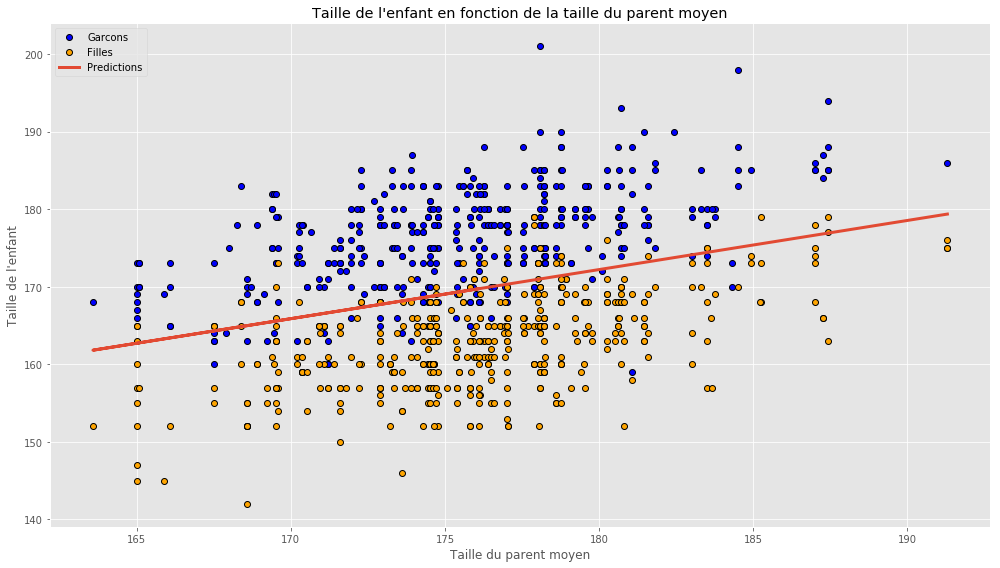

In [152]:
X = galton[['MidParents']] # Variables explicatives
y = galton['Height'] # Variable à expliquer

# Donnees correspondant aux garçons
X_garcons = galton[galton.Gender == 'M']['MidParents']
y_garcons = galton[galton.Gender == 'M']['Height']

# Donnees correspondant aux filles
X_filles = galton[galton.Gender == 'F']['MidParents']
y_filles = galton[galton.Gender == 'F']['Height']

# Affichage des donnees (filles et garçons) sur le graphique
plt.xlabel("Taille du parent moyen"), plt.ylabel("Taille de l'enfant")
plt.title('Taille de l\'enfant en fonction de la taille du parent moyen')
plt.plot(X_garcons, y_garcons, 'o', label="Garcons", color="blue", markeredgecolor='k', markeredgewidth=1)
plt.plot(X_filles, y_filles, 'o', label="Filles", color="orange", markeredgecolor='k', markeredgewidth=1)

# Affichage de la droite de prediction obtenue par la methode des moindres
plt.plot(X, skl_linmod.predict(X), linewidth=3, label="Predictions")
plt.legend(numpoints=1, loc=2)  # numpoints = 1 for nicer display
plt.tight_layout()
plt.show()

### Question 9

9a) Visualiser un estimateur de la densité des résidus ri = yi - yˆi.

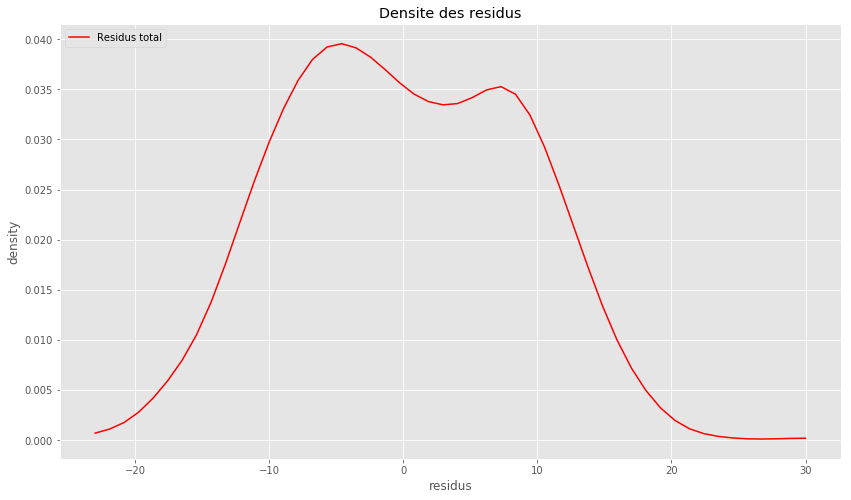

(<matplotlib.legend.Legend at 0x11907c160>, None)

In [153]:
# Calcul des residus
galton['Residus'] = galton['Height'] - skl_linmod.predict(X)

# Calcul d'un estimateur gaussien de la densite des residus
density_residus = gaussian_kde(galton['Residus'])

# Calcul de l'axe des ordonnées du graphe
xs = np.linspace(galton['Residus'].min(), galton['Residus'].max())

# Affichage du graphe de la densité des résidus
plt.title("Densite des residus")
plt.xlabel("residus"), plt.ylabel("density")
plt.plot(xs,density_residus(xs), color="red", label="Residus total")
plt.legend(loc=2), plt.show()

D'après le graphique précedent, l'hypothèse de normalité n'est pas crédible car l'estimation de la densité des résidus n'est pas une gaussienne. Cependant, nous pouvons imaginer que ce graphique est une combinaison de deux courbes gaussienne.

9b) Calculer ensuite αg (resp. αf ) les proportions de garçons (resp.de filles) dans la population. On ajoutera ensuite sur le graphique précédent, les fonctions αg*pg et αf*pf , avec pg (resp. pf) les densités des résidus pour les garçons (resp. pour les filles).

In [154]:
# Calcul de le proportion de garçons dans la population
prop_m = float(len(galton.Gender[galton.Gender == 'M']))/len(galton.index)
print('Proportion de garçons dans la population : ' + str(prop_m))

# Calcul de le proportion de filles dans la population
prop_f = float(len(galton.Gender[galton.Gender == 'F']))/len(galton.index)
print('Proportion de filles dans la population : ' + str(prop_f))

# Calcul de la densite des residus pondere par la proportion de garçons
# galton['Residus_M'] = galton['Residus'][galton.Gender == 'M'] * prop_m
galton['Residus_M'] = galton['Residus'][galton.Gender == 'M']
residus_m = galton['Residus_M'].dropna(axis=0, how='any')

# Calcul de la densite des residus pondere par la proportion de filles
# galton['Residus_F'] = galton['Residus'][galton.Gender == 'F'] * prop_f
galton['Residus_F'] = galton['Residus'][galton.Gender == 'F']
residus_f = galton['Residus_F'].dropna(axis=0, how='any')

Proportion de garçons dans la population : 0.5178173719376392
Proportion de filles dans la population : 0.4821826280623608


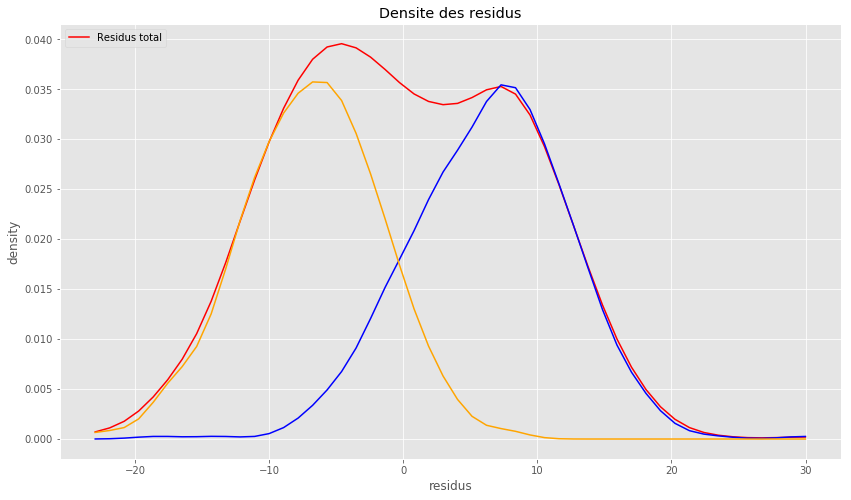

In [155]:
# Calcul d'un estimateur gaussien de la densite des residus pour les garcons
density_residus_m = gaussian_kde(residus_m) 

# Calcul d'un estimateur gaussien de la densite des residus pour les filles
density_residus_f = gaussian_kde(residus_f)

# Calcul de l'axe des ordonnées du graphe
min_residus = min(galton['Residus'].min(), residus_m.min(), residus_f.min())
max_residus = max(galton['Residus'].max(), residus_m.max(), residus_f.max())
xs = np.linspace(min_residus, max_residus)

# Affichage du graphe de la densité des résidus total
plt.plot(xs,density_residus(xs), color="red", label="Residus total")
plt.title("Densite des residus"), plt.legend(loc=2)
plt.xlabel("residus"), plt.ylabel("density")

# Affichage du graphe de la densité des résidus des garçons pondérée
plt.plot(xs,density_residus_m(xs) * prop_m, color="blue", label="Residus garçons")

# Affichage du graphe de la densité des résidus des filles pondérée
plt.plot(xs,density_residus_f(xs) * prop_f, color="orange", label="Residus filles")

plt.show()

### Question 10

10) Régresser cette fois les xi sur les yi (et non plus les yi sur les xi). On veut comparer numériquement les coefficients αˆ0 et αˆ1 ainsi obtenus par rapport aux ˆθ0 et ˆθ1 du modèle original.

In [156]:
# Vérification numérique des coefficients obtenus par rapport à ceux du modele original
y = galton[['Height']]
X = galton['MidParents']

# Calcul de la regression lineaire
skl_linmod = linear_model.LinearRegression(fit_intercept=True)
skl_linmod.fit(y, X)

# Valeurs obtenues par la regression lineaire
alpha1 = skl_linmod.coef_
alpha0 = skl_linmod.intercept_

# Calcul de la moyenne de x et y
ymoy = np.mean(y)
xmoy = np.mean(X)

# Verification de la formule pour calculer alpha0
formule_alpha0 = xmoy + (ymoy / xmoy) * (np.var(X) / np.var(y)) * (teta0 - ymoy)
print('Formule 1 verifie : ' + str(np.isclose(alpha0, formule_alpha0)))

# Verification de la formule pour calculer alpha1
formule_alpha1 = (np.var(X) / np.var(y)) * teta1
print('Formule 2 verifie : ' + str(np.isclose(alpha1, formule_alpha1)))

Formule 1 verifie : [ True]
Formule 2 verifie : [ True]


## Exercice 2 : Analyse du jeu de données auto-mpg

On travaille dans cette partie sur le fichier auto-mpg.data. On cherche à régresser linéairement la consommation des voitures sur leurs caractéristiques : nombre de cylindres, cylindrées (engine displacement en anglais), puissance, poids, accélération, année, pays d'origine et le nom
de la voiture. Le vecteur contenant la consommation des voitures (plus précisément la distance parcourue, en miles, pour un gallon, ou mpg) est noté y ; les colonnes de X sont les régresseurs quantitatifs, donc pour le moment on laisse de côté les variables origin et car name.

### Question 11

11) Importer avec Pandas la base de données disponible ici https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original. On ajoutera le nom des colonnes en consultant l'adresse : https://archive.ics.uci.edu/ml/machinelearning-databases/auto-mpg/auto-mpg.names avec l'attribut 'name' de import_csv. On pourra regarder l'intérêt de l'option sep=r"\s\+" si besoin. Y a-t-il un marqueur utilisé pour les données manquantes dans le fichier utilisé ? Si besoin, enlever les lignes possédant des valeurs manquantes dans la base de données.

In [157]:
# Load data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original'
fields_mpg = ['mpg','cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']
df_mpg = pd.read_csv(url, sep=r'\s+', na_values=['?', '', 'NA'], names=fields_mpg)
df_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


In [158]:
# Calcul du nombre de données manquantes
print('Données manquantes : \n' + str(df_mpg.isnull().sum()))

# Supprime toutes les lignes ayant des valeurs manquantes
len_df_mpg_init = len(df_mpg)
df_mpg = df_mpg.dropna(axis=0, how='any')
len_df_mpg_clean = len(df_mpg)

# Affiche le nouveau nombre de ligne supprimé apres "nettoyage"
print("\nNombre de lignes supprimés : " + str(len_df_mpg_init - len_df_mpg_clean))

Données manquantes : 
mpg             8
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

Nombre de lignes supprimés : 14


### Question 12

12) Calculer l'estimateur des moindres carrés θˆ (avec ordonnée à l'origine) et sa prédiction yˆ sur une sous partie de la base obtenue en gardant les 9 premières lignes. Que constatez-vous pour les variables cylinders et model year ?

In [159]:
# Variable à expliquer (9 premieres lignes)
y = df_mpg.head(n=9)['mpg'].values.reshape(9, 1)

# Variables explicatives (9 premieres lignes)
features = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']
X = df_mpg.head(n=9)[features].values.reshape(9, len(features))

# Calcul de la regression lineaire par la methode des moindres carrés 
skl_linmod = linear_model.LinearRegression(fit_intercept=True)
skl_linmod.fit(X, y)

# Calcul de la droite de prediction par la methode des moindres carrés 
y_pred = skl_linmod.predict(X)

print('cylinders : ' + str(skl_linmod.coef_[0][0]))
print('model year : ' + str(skl_linmod.coef_[0][5]))

cylinders : 0.0
model year : 0.0


Le coefficient de la regression lineaire pour les variables 'cylinders' et 'model year' est nul. Les variables de ces colonnes sont donc constantes sur les 9 premieres lignes du fichier et nous apportent aucune informations pour expliquer la consommation des véhicules.

### Question 13

13) Calculer θˆ et yˆ cette fois sur l'intégralité des données, après les avoir centrées et réduites. Quelles sont les deux variables qui expliquent le plus la consommation d'un véhicule ?

In [160]:
# Variable à expliquer
y = df_mpg['mpg'].values.reshape(len(df_mpg), 1)

# Variables explicatives
features = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']
X = df_mpg[features]

# Normalisation des variables explicatives
scaler_X = StandardScaler().fit(X)
X_std = scaler_X.transform(X)

# Normalisation des variables à expliquer
scaler_y = StandardScaler().fit(y)
y_std = scaler_y.transform(y)

In [161]:
# Calcul de la regression lineaire par la methode des moindres carrés
skl_linmod = linear_model.LinearRegression(fit_intercept=True)
skl_linmod.fit(X_std, y_std)

# Classement des variables les plus explicatives
df = pd.DataFrame(np.absolute(skl_linmod.coef_[0]), index=features, columns=['Coefficients'])
df = df.sort_values('Coefficients', ascending=False)
df

,Coefficients
weight,0.739444
model year,0.355567
displacement,0.102947
cylinders,0.072091
acceleration,0.030142
horsepower,0.001930


Les deux variables qui expliquent le plus la consommation d'un véhicule sont "weight" et "model year".

### Question 14

14) Calculer ||r||2 (le carré de la norme du vecteur des résidus), puis ||r||2 / (n-p). Vérifier numériquement que...

In [162]:
# Calcul du carré de la norme du vecteur des résidus
y_pred = skl_linmod.predict(X_std)
r2 = np.linalg.norm(y_std - y_pred)**2
print('Calcul carre de la norme du vecteur des residus, r2 : ' + str(r2))

# Calcul du carré de la norme du vecteur des résidus / (n-p)
r2_ratio = r2/(len(y_std)-len(features))
print('Calcul r2/(n-p) : ' + str(r2_ratio))

Calcul carre de la norme du vecteur des residus, r2 : 74.7719266969
Calcul r2/(n-p) : 0.193709654655


In [163]:
# Vérification numérique de l'equation 

# Calcul de la moyenne de la variable à expliquer, y normalisé
y_std_moy = np.mean(y_std)

# Calcul de la partie gauche de l'equation
left_part = np.linalg.norm(y_std - y_std_moy)**2

# Calcul de la partie droite de l'equation
right_part = r2 + np.linalg.norm(y_pred - y_std_moy)**2

# Vérification de l'egalité des deux parties
print('Formule verifie : ' + str(np.isclose(right_part, left_part)))

Formule verifie : True


### Question 15

15) Supposons que l'on vous fournisse les caractéristiques suivantes d'un nouveau véhicule. Prédire sa consommation.

In [164]:
# Caracteristiques du nouveau vehicule
new_car = [6, 225, 100, 3233, 15.4, 76]

# Normalisation des caracteristiques du nouveau vehicule
new_car_std = scaler_X.transform([new_car])

# Calcul de la prediction normalisé de la consommation du nouveau vehicule
new_car_predict_std = skl_linmod.predict(new_car_std)[0]

# Calcul de la prediction de la consommation du nouveau vehicule
new_car_predict = scaler_y.inverse_transform(new_car_predict_std)

# Affichage de la prediction de la consommation du nouveau vehicule
print('Prediction exacte de la conso. du nouveau vehicule : ' + str(new_car_predict[0]) + 'mpg')
print('Prediction arrondie de la conso. du nouveau vehicule : ' + str(round(new_car_predict[0], 1)) + 'mpg')

Prediction exacte de la conso. du nouveau vehicule : 21.7762201826mpg
Prediction arrondie de la conso. du nouveau vehicule : 21.8mpg


### Question 16

16) Utiliser la transformation PolynomialFeatures de sklearn sur les données brutes, pour ajuster un modèle d'ordre deux (avec les termes d'interactions : interaction_only=False). On normalisera et recentrera après avoir créé les nouvelles variables explicatives. Quelle est alors la variable la plus explicative de la consommation ?

In [165]:
# Variables explicatives
features = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']
X = df_mpg[features]

# Calcul d'un modele d'ordre deux avec les termes d'interactions
poly = PolynomialFeatures(degree=2, interaction_only=False)

# Creation d'une nouvelles matrice explicatives
# Combinaison de toutes les variables explicatives initiales
X_poly = poly.fit_transform(X)

# Nom des variables explicatives de la nouvelles matrice explicatives
new_features = poly.get_feature_names(features)

# Normalisation des données
scaler_X_poly = StandardScaler().fit(X_poly)
X_poly_std = scaler_X_poly.transform(X_poly)

# Calcul de la regression lineaire 
skl_linmod = linear_model.LinearRegression(fit_intercept=True)
skl_linmod.fit(X_poly_std, y_std)

# Classement des variables les plus explicatives
df = pd.DataFrame(np.absolute(skl_linmod.coef_[0]), index=new_features, columns=['Coefficients'])
df = df.sort_values('Coefficients', ascending=False)
df.head()

,Coefficients
displacement,6.213423
displacement model year,5.604113
model year^2,3.829164
model year,3.448479
weight model year,3.222055


La variable la plus explicative de la consommation d'un véhicule est donc "displacement".

### Question 17

17) On revient ici au modèle sans interactions. Proposer une manière de gérer la variable origin, par exemple avec pd.get_dummies. On ajustera un modèle linéaire sans constante dans ce cas. Déterminer laquelle des trois origines est la plus efficace en terme de consommation.

In [166]:
# Convertir la variable catégorique 'origin' en variables indicatrices
df_mpg_origin = pd.get_dummies(df_mpg, columns=['origin'])

# Supprime la colonne 'car name"
df_mpg_origin = df_mpg_origin.drop('car name', 1)

# Renomme les nouvelles colonnes créées
df_mpg_origin.rename(columns = {'origin_1.0':'usa', \
                          'origin_2.0':'europe', \
                          'origin_3.0':'japan'}, inplace = True)

# Affiche la nouvelle data frame créée
df_mpg_origin.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,usa,europe,japan
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1,0,0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1,0,0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1,0,0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1,0,0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1,0,0


In [167]:
# Variable à expliquer
y = df_mpg_origin['mpg']

# Variables explicatives
features = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'usa', 'europe', 'japan']
X = df_mpg_origin[features]

# Calcul de la regression lineaire
skl_linmod = linear_model.LinearRegression(fit_intercept=False)
skl_linmod.fit(X, y)

# Classement des variables les plus explicatives
df = pd.DataFrame(np.absolute(skl_linmod.coef_[-3:]), index=features[-3:], columns=['Coefficients'])
df = df.sort_values('Coefficients', ascending=False)
df

,Coefficients
usa,17.954602
europe,15.324600
japan,15.101374


L'origine la plus explicative (efficace en termes de consommation) de la consommation d'un véhicule est donc "usa".

### Question 18

18) Procéder comme pour la question précédente, mais cette fois pour mesurer l'inffluence de la marque de la voiture. On ne considère ici que les variables 'cylinders','displacement','horsepower', 'weight', 'acceleration', 'model year' en plus de la marque. On pourra utiliser str.split, str.replace et get_dummies.

In [168]:
df_mpg_brand = df_mpg

# Créé une nouvelle colonne avec la marque de chaque voiture
df_mpg_brand['brand'] = df_mpg_brand['car name'].str.split().str.get(0).replace('toyouta', 'toyota') \
    .replace('vw', 'volkswagen').replace('vokswagen', 'volkswagen').replace('mercedens-benz', 'mercedes') \
    .replace('chevroelt', 'chevrolet').replace('chevy', 'chevrolet').replace('maxda', 'mazda')

# Supprime les colonnes 'origin' et 'car name"
df_mpg_brand = df_mpg_brand.drop('origin', 1)
df_mpg_brand = df_mpg_brand.drop('car name', 1)

# Convertir la variable catégorique 'brand' en variables indicatrices
df_mpg_brand = pd.get_dummies(df_mpg_brand, columns=['brand'])

# Affiche la nouvelle data frame créée
df_mpg_brand.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,brand_amc,brand_audi,brand_bmw,...,brand_peugeot,brand_plymouth,brand_pontiac,brand_renault,brand_saab,brand_subaru,brand_toyota,brand_triumph,brand_volkswagen,brand_volvo
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [169]:
# Variable à expliquer
y = df_mpg_brand['mpg'].values.reshape(len(df_mpg_brand), 1)

# Variables explicatives
features = df_mpg_brand.columns.values[7:]
X = df_mpg_brand[features]

# Normalisation des variables explicatives
scaler_X = StandardScaler().fit(X)
X_std = scaler_X.transform(X)

# Normalisation des variables à expliquer
scaler_y = StandardScaler().fit(y)
y_std = scaler_y.transform(y)

# Calcul de la regression lineaire
skl_linmod = linear_model.LinearRegression(fit_intercept=False)
skl_linmod.fit(X_std, y_std)

# Classement des variables les plus explicatives
df = pd.DataFrame(np.absolute(skl_linmod.coef_[0]), index=features, columns=['Coefficients'])
df = df.sort_values('Coefficients', ascending=False)
df.head()

,Coefficients
brand_ford,7.786758e+12
brand_chevrolet,7.716410e+12
brand_plymouth,6.410491e+12
brand_dodge,6.117677e+12
brand_amc,6.015686e+12


La marque la plus explicative (efficace en termes de consommation) de la consommation d'un véhicule est donc "ford".

### Question 19

19) Reprendre la matrice X obtenue (sans variables catégorielles) question 13. Obtenir numériquement la SVD (partielle) de X=USVT (par exemple en considérant l'option full_matrices=False) ; vérifier numériquement que H=UUT est une projection orthogonale.

In [170]:
# Variable à expliquer
y = df_mpg['mpg'].values.reshape(len(df_mpg), 1)

# Variables explicatives
features = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']
X = df_mpg[features]

# Normalisation des variables explicatives
scaler_X = StandardScaler().fit(X)
X_std = scaler_X.transform(X)

# Normalisation des variables à expliquer
scaler_y = StandardScaler().fit(y)
y_std = scaler_y.transform(y)

# Partial SVD
U, s, V = np.linalg.svd(X_std, full_matrices=False)

# H est la matrice d'une projection orthogonale si, et seulement si, HT=H=H**2
H = np.dot(U, np.transpose(U))
HT = np.transpose(H)
H2 = np.dot(H, H)

# Verification que H est symetrique 
symetrique = np.allclose(H, HT)
print('H est symetrique si HT = H : ' + str(symetrique))

# Verification que H est idempotente 
idempotente = np.allclose(H, H2)
print('H est idempotente si H**2 = H : ' + str(idempotente))

# Verification que H est une projection orthogonale 
print('\nH est une projection orthogonale si H = HT et H = H**2')
proj_orth = np.all([symetrique, idempotente])
print('H est une projection orthogonale : ' + str(proj_orth))


H est symetrique si HT = H : True
H est idempotente si H**2 = H : True

H est une projection orthogonale si H = HT et H = H**2
H est une projection orthogonale : True


### Question 20

20) La diagonale de la matrice H, forme le vecteur des leviers, qu'on ajoutera comme nouvelle variable. Trier la base de données en fonction de cette variable, et expliquer en quoi les voitures ayant les trois valeurs de levier maximales semblent atypiques.

In [171]:
# Calcul de la diagonale de la matrice H
H_diag = np.diag(H)

# Ajout de la diagonale de la matrice H dans le data frame
df_mpg['H_diag'] = H_diag

# Classement de la base de donnees en fonction de la variable 'H'
df_mpg_sorted = df_mpg.sort_values('H_diag', ascending=False)

# Affichage des voitures ayant les trois valeurs de levier maximales
df_mpg_sorted.head(n=3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,brand,H_diag
19,14.0,8.0,455.0,225.0,3086.0,10.0,70.0,1.0,buick estate wagon (sw),buick,0.187359
34,9.0,8.0,304.0,193.0,4732.0,18.5,70.0,1.0,hi 1200d,hi,0.084799
32,10.0,8.0,307.0,200.0,4376.0,15.0,70.0,1.0,chevy c20,chevrolet,0.061549


In [172]:
# Sort the dataset and print the rows with the highest leverage value
print(df_mpg_sorted.describe())

              mpg   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1.705783    104.644004   38.491160   849.402560   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.000000    4.000000    105.000000   75.000000  2225.250000   
50%     22.750000    4.000000    151.000000   93.500000  2803.500000   
75%     29.000000    8.000000    275.750000  126.000000  3614.750000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model year      origin      H_diag  
count    392.000000  392.000000  392.000000  392.000000  
mean      15.541327   75.979592    1.576531    0.015306  
std        2.758864    3.683737    0.805518    0.013788  
min        8.000000   70.000000    1.000000    0.001825  
25%       13.775000   73.000000    1.000000    0.007979  
50%

Les trois voitures ayant les valeurs de "levier" maximales semblent atypiques car elles :
    - ont le nombre de 'cylinders' maximal
    - sont les plus vieilles (model year = max)
    - sont d'origine américaine
    - ont des valeurs proches du maximum pour les variables : 'displacement', 'horsepower' et 'weight' 
    